# Tidal QC Notebook

<img style="float:right;" src="https://id.dewberry.com/clients/Templates/DewberryLogo_RGB.png" width=150px>

### Description
Read data from ADCIRC input files, verify attribute parametrization is appropriate.

---

#### - Requirements
  1. Dewberry ADCIRC Python Library (Python 3.6)
  2. ADCIRC Tidal output
  
#### - Usage:
  1. Import Libraries & Assign Paths
  2. Read in data from file:
  3. Add comments/Request feedback
  4. Save Report
  
 ---

## Causes for Errors

- From the 2010 paper on the Validation Test Report for the ADvanced CIRCulation, they described how the constituents have a relative bias error. They compared the observed versus the modeled at each of their station to determine this.

- The major constituent was M2 (Principal lunar semidiurnal constituent) that had an average bias of 6cm. The other constituents had an average bias around 1cm.

*Blain, C. A., Linzell, R. S., Chu, P., & Massey, C. (2010). Validation Test Report for the ADvanced CIRCulation. Security.*


### Import Libraries, Assign Paths, & Variables

In [1]:
import pandas as pd
from importlib import reload
import analysis ; reload(analysis)
from analysis import *
qc_staff = 'Tyler Miesse'
root_dir = r'N:\TECH\COASTAL\NC_STORM_SURGE_MODELING_UPDATE\SurgeModeling\Validation\tidal\tm_tide1'
root_dir = r'N:\TECH\COASTAL\NC_STORM_SURGE_MODELING_UPDATE\SurgeModeling\Validation\tidal\tm_tide1'
file = 'fort.61.nc'
start,freq = '20171213 12:20:00','6min'
station,attribute,name = 0,'zeta',' Prediction'
table = table_station(root_dir,file,start,freq,station,attribute,name)
pred1 = noaa_data(root_dir,'Duke_20171213_20180113.csv')
pred2 = noaa_data(root_dir,'Duke_20180101_20180201.csv')
pred = noaa_data(root_dir,'Duke_20171213_20180201.csv')
obs  = noaa_data(root_dir,'Duke_20171213_20180201_obs.csv')

### Find the Bias in the Tidal Run
- Using these equations to find the bias in the model. The calculated bias will then be used to adjust the outputs from the model.
- Model-data base comparisons for the baseline to find the resulted bias error.

\begin{align}
SI = \frac{ \sqrt{ \frac{1}{N} \sum_{i=1}^N (E_i - \bar{E})^2}}{\frac{1}{N} \sum_{i=1}^N |O_i|}      
\quad ; \quad
Relative Bias = \frac{\frac{1}{N} \sum_{i=1}^N (E_i - \bar{E})}{\frac{1}{N} \sum_{i=1}^N |O_i|}
\quad ; \quad
Bias = O_i - S_i
\end{align}

*Dietrich, J. C., Tanaka, · S, Westerink, · J J, Dawson, · C N, Luettich, R. A. ·, Zijlema, M., … Luettich, R. A. (n.d.). Performance of the Unstructured-Mesh, SWAN+ ADCIRC Model in Computing Hurricane Waves and Surge. https://doi.org/10.1007/s10915-011-9555-6*

*Technology Riverside Inc., & AECOM. (2015). Mesh Development, Tidal Validation, and Hindcast Skill Asessment of an ADCIRC Model for the Hurricane Storm Surge Operational Forecast System on the US Gulf-Atlantic Coast, 179. https://doi.org/10.7921/G0MC8X6V*

In [4]:
rbias,bias,SI,noaa_bias = calc_bias(table,name,obs,pred)

### The Original Tidal Model Output
- The original tidal output from adcirc compared to NOAA's predicted tide

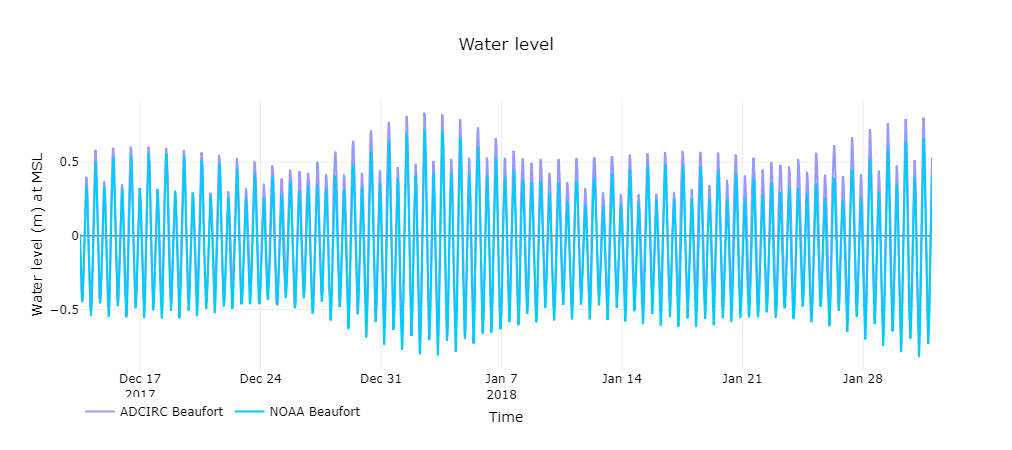

In [5]:
names = ['ADCIRC Beaufort','NOAA Beaufort']
data = plot(table,name,names,pred)
layout = go.Layout(dict(title = 'Water level'),xaxis = dict(title = 'Time'),
          yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),font = dict(color = 'rgb(0,0,0)'),
          paper_bgcolor = 'rgb(255,255,255)',plot_bgcolor = 'rgb(255,255,255)')
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

---
#### <font color='blue'>QC Comments: (date if applicable)</font> *10/04 The modeled water surface elevation is showing a higher amplitude.*
---

#### <font color='blue'>QC Response</font> 
---

### Plot Relative Bias from the earlier equation
- After calculating the relative bias from the output it is then plotted over time.
- As you can see at some points there is a large amount of bias, this means the model is over estimating the water surface elevation in the area. This cannot be completely fixed, but the model should probably rerun. 

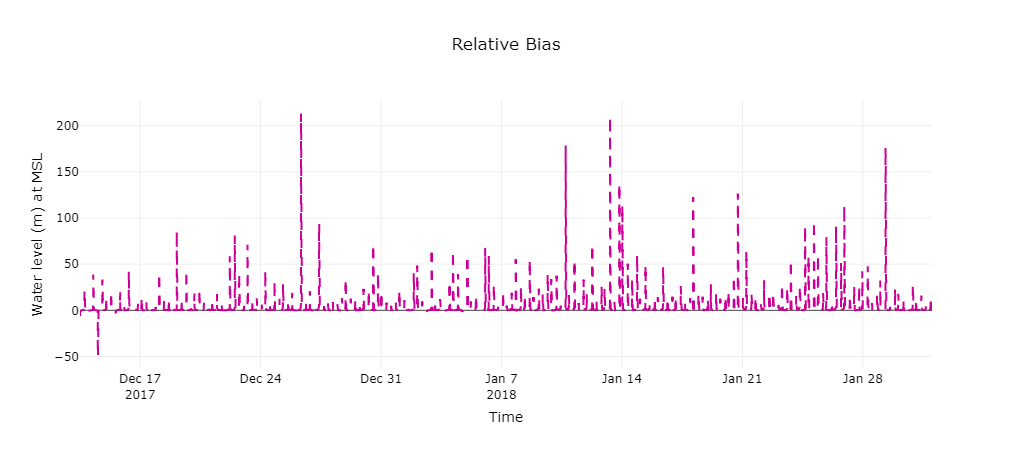

In [6]:
trace = go.Scatter(x = table['Date Time'],y = rbias[0],
                name = 'Obs - ADCIRC',mode = 'lines',
                line = dict(color = ('rgb(204, 0, 153)'),dash = 'dash'))
data = [trace]
layout = go.Layout(dict(title = 'Relative Bias'),
          xaxis = dict(title = 'Time'),yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),font = dict(color = 'rgb(0,0,0)'),
          paper_bgcolor = 'rgb(255,255,255)',plot_bgcolor = 'rgb(255,255,255)')
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

---
#### <font color='blue'>QC Comments: (date if applicable)</font> 
---

#### <font color='blue'>QC Response</font>
---

### Plot Bias
- After calculating the bias from the output it is then plotted over time.

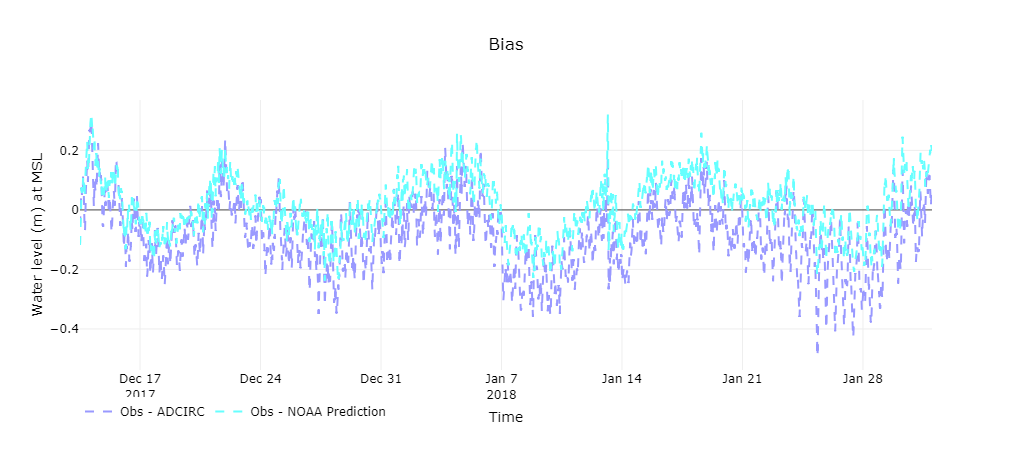

In [7]:
names = ['Obs - ADCIRC','Obs - NOAA Prediction']
data = plot_bias(table,bias,noaa_bias,names)
layout = go.Layout(dict(title = 'Bias'),
          xaxis = dict(title = 'Time'),yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),font = dict(color = 'rgb(0,0,0)'),
          paper_bgcolor = 'rgb(255,255,255)',plot_bgcolor = 'rgb(255,255,255)')
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

---
#### <font color='blue'>QC Comments: (date if applicable)</font> 
---

#### <font color='blue'>QC Response</font>
---

### After removing the bias from the tidal model the plot looks like this.
- Using the average bias that was calculated. It is then applied to the output.

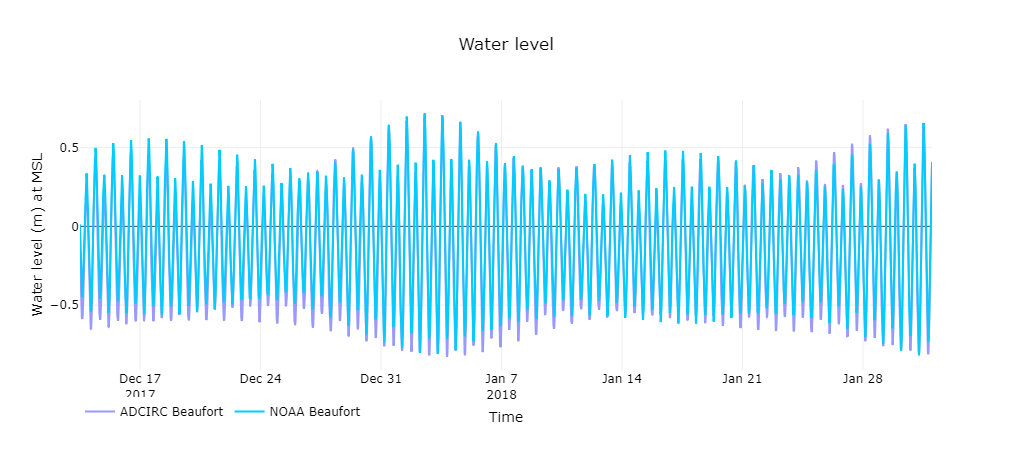

In [15]:
table[' Prediction'] = table[' Prediction']+1-np.average(rbias[0].dropna())
names = ['ADCIRC Beaufort','NOAA Beaufort']
data = plot(table,name,names,pred)
layout = go.Layout(dict(title = 'Water level'),xaxis = dict(title = 'Time'),
          yaxis = dict(title = 'Water level (m) at MSL'),                     
          legend= dict(orientation = "h"),font = dict(color = 'rgb(0,0,0)'),
          paper_bgcolor = 'rgb(255,255,255)',plot_bgcolor = 'rgb(255,255,255)')
fig = go.Figure(data=data, layout=layout)
interactive = iplot(fig)

---
#### <font color='blue'>QC Comments: (date if applicable)</font> 
---

#### <font color='blue'>QC Response</font>
---

### The 9/30/18 Tidal Run allocations cost 125.1 hours
#### - Another Tidal Run is suggested if we are to use the tidal parameters in the synthetic storms

In [ ]:
def read_fort13(self, attribute):
    x = 0
    table_v2 = pd.DataFrame()
    with open(self.fp, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if attribute['Parameter'].iloc[-1] in line:
                start_read_line = i+4
                break
    for x in range(len(attribute['Parameter'])):
        with open(self.fp, 'r') as f:
            idx=0
            get_count = False
            lines = f.readlines()
            table13 = []
            for i, line in enumerate(lines):
                if i < start_read_line:
                    continue
                elif attribute['Parameter'][x] in line:
                    attr = line
                    get_count = True
                elif get_count:
                    nodes = int(line)
                    i+=1
                    if i>nodes:
                        nodes=i+nodes
                    for ii in range(i,nodes):
                        line = lines[ii]
                        table13.append(line.split('\n')[0])
                    get_count = False
                    idx+=1
        data = []
        if len(table13) == 0:
            data.append('NaN')
        for i in range(len(table13)): 
            data.append(table13[i])   
        if len(table_v2) == 0:
            table_v2 = pd.DataFrame(data)
            table_v2.columns=[attribute['Parameter'][x].split('_')[0]+'_'+attribute['Parameter'][x].split('_')[1]]
        else:
            table_v3 = pd.DataFrame(data)
            table_v3.columns=[attribute['Parameter'][x].split('_')[0]+'_'+attribute['Parameter'][x].split('_')[1]]
            table_v2 = pd.concat([table_v2,table_v3],axis=1,sort=False)
    return table_v2 